In [58]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import pickle 
import seaborn as sns 
import spacy

from scipy import stats
import itertools

Populating the interactive namespace from numpy and matplotlib


/Users/victor/miniconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [41]:
data = pd.read_csv("../data/ES_2-5_79cases_newVnames.csv")

# Drop useless cols
data = data.drop(['TCGender'], axis = 1)

In [43]:
#Replace 999 with nan
data[data == 999] = np.nan
data.head()

,FAMILY,FB2,Eng2,FB3,Eng3,FB4,Eng4,FB5,Eng5,Con2,...,Obs4,Act4,Car4,Hop4,Vid4,Con5,Obs5,Act5,Car5,Hop5
0,ESC319,5.0,4,NaN,NaN,4.2,4.0,4.200,5,5,...,4,4,5,5,0,5,4,4,4,4
1,ESC343,4.0,4,NaN,NaN,4.0,3.0,4.600,5,4,...,4,3,5,4,0,5,5,4,4,5
2,ESC413,5.8,4,6.4,7.0,4.4,4.0,5.924,9,5,...,5,4,5,4,0,8,8,8,8,9
3,ESC432,6.4,7,NaN,NaN,3.0,3.0,5.724,9,7,...,2,3,5,3,0,8,8,8,8,8
4,ESC452,3.6,4,NaN,NaN,5.4,6.0,3.800,4,4,...,5,5,5,6,0,5,4,4,3,3


In [44]:
data_melt = pd.melt(data, id_vars=['FAMILY'])
data_melt.head()

,FAMILY,variable,value
0,ESC319,FB2,5
1,ESC343,FB2,4
2,ESC413,FB2,5.8
3,ESC432,FB2,6.4
4,ESC452,FB2,3.6


In [47]:
# Transform value -> float
data_melt = data_melt[data_melt.value != ' ']
data_melt['value'] = data_melt['value'].astype(float)

In [48]:
#Transform variable -> (variable, time)
data_melt['time'] = 0
data_melt[['variable', 'time']] = data_melt['variable'].apply(lambda x: (x[:-1], x[-1])).apply(pd.Series)
data_melt.head()

,FAMILY,variable,value,time
0,ESC319,FB,5.0,2
1,ESC343,FB,4.0,2
2,ESC413,FB,5.8,2
3,ESC432,FB,6.4,2
4,ESC452,FB,3.6,2


In [49]:
data_melt.value.unique()

array([ 5.   ,  4.   ,  5.8  ,  6.4  ,  3.6  ,  6.   ,  5.4  ,  5.6  ,
        7.   ,  4.8  ,  6.8  ,  4.6  ,  3.4  ,  7.2  ,  5.2  ,  2.8  ,
        4.2  ,  7.4  ,  6.2  ,  4.4  ,  6.6  ,  3.   ,  2.4  ,  8.   ,
        9.   ,    nan,  3.8  ,  2.6  ,  7.8  ,  2.   ,  7.6  ,  1.4  ,
        3.2  ,  2.2  ,  5.924,  5.724,  5.524,  6.524,  1.124,  3.724,
        1.724,  2.924,  5.124,  4.724,  1.   ,  0.   ])

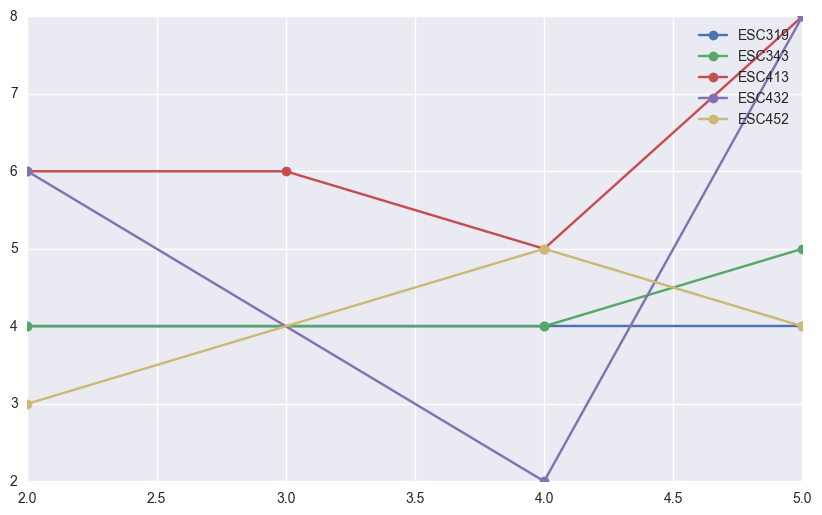

In [62]:
f, ax = plt.subplots()
for id_, fam in itertools.islice(data_melt.groupby("FAMILY"), 5):
    ax.plot(fam[fam['variable'] == 'Obs']['time'], fam[fam['variable'] == 'Obs']['value'], '-o', label = id_)
plt.legend()
plt.show()